In [28]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-wcslvg3s
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-wcslvg3s


In [3]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
from keras.layers import Input,Dense,Reshape,Conv2D,Dropout,multiply,Dot,Concatenate,subtract,ZeroPadding2D
from keras.layers import BatchNormalization,LeakyReLU,Flatten
from keras.layers import Conv2DTranspose as Deconv2d
from keras.models import Model
import cv2
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from google.colab import files
from keras import backend as K
import smtplib
from keras.activations import relu 
from sklearn.utils import shuffle
from google.colab import drive

In [4]:
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [5]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Working with 600 images
Input Image examples: 
1.jpg


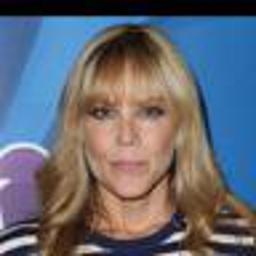

5.jpg


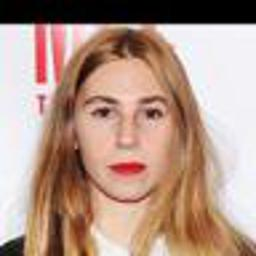

8.jpg


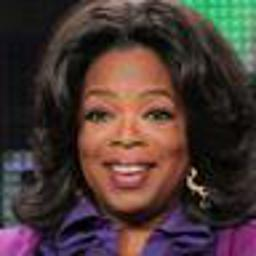

2.jpg


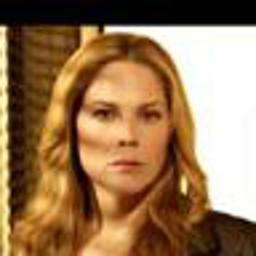

6.jpg


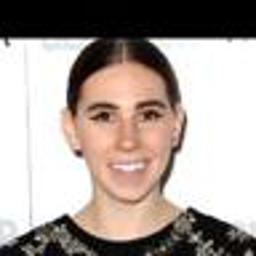

360.jpg


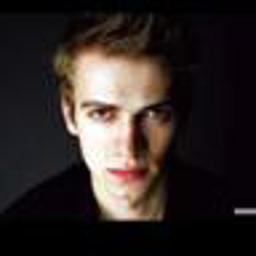

224.jpg


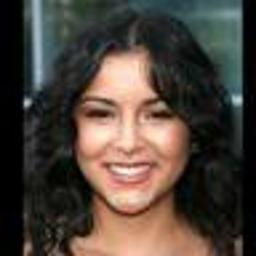

13.jpg


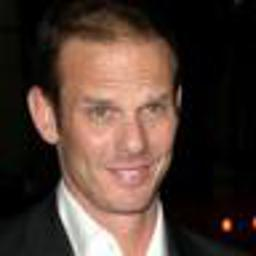

280.jpg


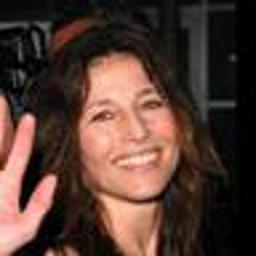

10.jpg


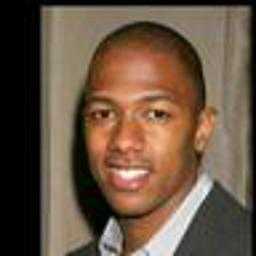

In [10]:
folder = '/content/gdrive/My Drive/dataset/input'

onlyfiles = [fi for fi in os.listdir(folder) if os.path.isfile(os.path.join(folder, fi))]

print("Working with {0} images".format(len(onlyfiles)))
print("Input Image examples: ")
for x in range(0,10):
   print(onlyfiles[x])
   display(_Imgdis(filename=folder + "/" + onlyfiles[x], width=256, height=256))


In [11]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append((_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
channels = 3
image_width = 256
image_height = 256
ratio = 1
image_width = int(image_width/ratio )
image_height = int(image_height/ratio)

#channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), image_height, image_width,channels),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((256,256,3))
    # Normalize
    dataset[i] = x
    i += 1
    if i % 250 == 0:
     print("%d images to array" % i)
     print("All images to array!")

Files in train_files: 600
250 images to array
All images to array!
500 images to array
All images to array!


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 480, Val set size: 60, Test set size: 60


Working with 600 images
Ground truth Image examples: 
1.jpg


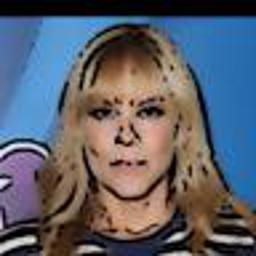

2.jpg


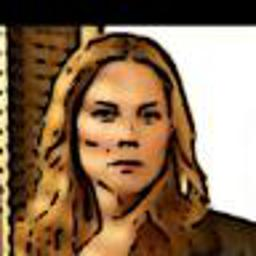

6.jpg


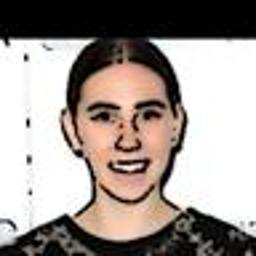

4.jpg


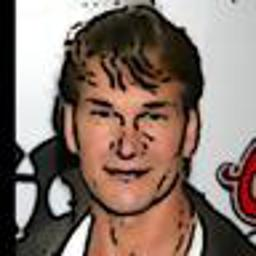

3.jpg


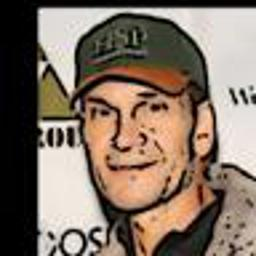

7.jpg


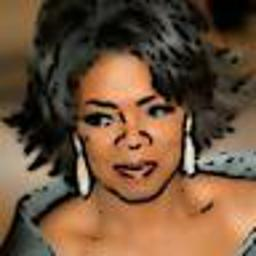

5.jpg


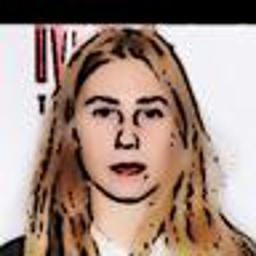

11.jpg


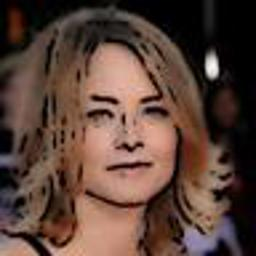

9.jpg


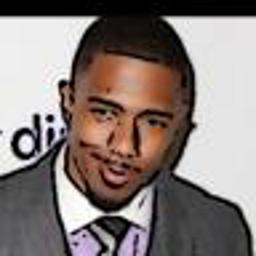

10.jpg


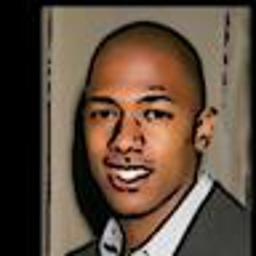

In [14]:
folder = '/content/gdrive/My Drive/dataset/ground_truth'
onlyfiless = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiless)))
print("Ground truth Image examples: ")
for i in range(0,10):
   print(onlyfiless[i])
   display(_Imgdis(filename=folder + "/" + onlyfiless[i], width=256, height=256))

In [15]:

from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
train_files = []
x_train = []
i=0
for _file in onlyfiless:
    train_files.append(_file)
    label_in_file = _file.find("_")
    x_train.append((_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
channels = 3
image_width = 256
image_height = 256
ratio = 1
image_width = int(image_width/ratio )
image_height = int(image_height/ratio)

#channels = 3
nb_classes = 1

datasets = np.ndarray(shape=(len(train_files), image_height, image_width,channels),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    y = img_to_array(img)  
    y = y.reshape((256,256,3))
    # Normalize
    

    datasets[i] = y
    i += 1
    if i % 250 == 0:
     print("%d images to array" % i)
     print("All images to array!")


Files in train_files: 600
250 images to array
All images to array!
500 images to array
All images to array!


In [16]:
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(datasets, x_train, test_size=0.2, random_state=33)
X_tests, X_vals, y_tests, y_vals = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 480, Val set size: 60, Test set size: 60


In [17]:
x= X_train
x=X_train/255
x=x*2-1
x=x.reshape(480,256,256,3)

y=X_trains/255

y=y*2-1
y=y.reshape(480,256,256,3)
print(x.shape)
print(y.shape)

(480, 256, 256, 3)
(480, 256, 256, 3)


In [18]:
x_shape=(256,256,3)  #1
y_shape=(256,256,3)    #3

In [19]:
def Generator():
   X = Input(shape = x_shape)
 
   C1 = Conv2D(64,kernel_size = 1, strides = 1,input_shape = x_shape)(X)
   C1 = LeakyReLU(0.2)(C1)
  
   C2 = Conv2D(128,kernel_size = 2, strides = 2)(C1)  
   C2 = LeakyReLU(0.2)(C2)
  
   C3 = Conv2D(256,kernel_size = 2, strides = 2)(C2)
   C3 = LeakyReLU(0.2)(C3)
  
   C4 = Conv2D(512,kernel_size = 2, strides = 2)(C3)
   C4 = LeakyReLU(0.2)(C4)

   C5 = Conv2D(512,kernel_size = 2, strides = 2)(C4)
   C5 = LeakyReLU(0.2)(C5)
  
   DC0 = Deconv2d(1024, kernel_size = 2, strides = 2)(C5)
   DC0 = LeakyReLU(0.2)(DC0)
   DC0= InstanceNormalization()(DC0)
   DC0 = Dropout(0.5)(DC0)
   DC0 = Concatenate(axis=3)([DC0, C4])

  
   DC1 = Deconv2d(256,kernel_size=2, strides = 2)(DC0)
   DC1 = LeakyReLU(0.2)(DC1)
   DC1= InstanceNormalization()(DC1)
   DC1 = Dropout(0.5)(DC1)             
   DC1 = Concatenate(axis=3)([DC1,C3])

  
   DC2 = Deconv2d(128,kernel_size=2, strides = 2)(DC1)
   DC2 = LeakyReLU(0.2)(DC2)
   DC2= InstanceNormalization()(DC2)  
   DC2 = Concatenate(axis=3)([DC2,C2])
  
   DC3 = Deconv2d(64,kernel_size=2, strides = 2)(DC2)
   DC3 = LeakyReLU(0.2)(DC3)
   DC3= InstanceNormalization()(DC3)
   DC3 = Concatenate(axis=3)([DC3,C1])
  
   CC4 = Conv2D(3,kernel_size=(1, 1), strides = (1, 1), activation="tanh")(DC3)
  
   m = Model(X,CC4)
   m.summary()
   return m

In [20]:
 
def Discriminator():
 
  X = Input(shape = x_shape)
  Y = Input(shape = y_shape)
  
  In = Concatenate(axis=3)([X,Y])
  
  C1 = Conv2D(64,kernel_size = 2, strides = 2,input_shape = x_shape)(In)
  C1= InstanceNormalization()(C1)
  C1 = LeakyReLU(0.2)(C1)
  C2 = Conv2D(128,kernel_size = 2, strides = 2)(C1)  
  C2= InstanceNormalization()(C2)
  C2 = LeakyReLU(0.2)(C2)
  
  C3 = Conv2D(256,kernel_size = 2, strides = 2)(C2)
  C3= InstanceNormalization()(C3)
  C3 = LeakyReLU(0.2)(C3)
  
  C4 = Conv2D(512,kernel_size = 1, strides = 1)(C3)
  C4= InstanceNormalization()(C4)
  C4 = LeakyReLU(0.2)(C4)

  C5 = Conv2D(1024,kernel_size = 1, strides = 1)(C4)
  C5= InstanceNormalization()(C5)
  C5 = LeakyReLU(0.2)(C5)
  
  D = Flatten()(C5)
  D = Dense(128)(D)
  D = Dense(1,activation='sigmoid')(D)
  
  m = Model([X,Y],D)
  m.summary()
  return m

In [21]:
X = Input(shape = x_shape)
Y = Input(shape = y_shape)

gen = Generator()
dis = Discriminator()

out = gen(X)
comb = dis([X,out])

out = Flatten()(out)
org = Flatten()(Y)

cos_dis = Dot(axes = 1,normalize = True)([out,org])

combined = Model([X,Y],[comb,cos_dis])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  256         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 256, 256, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [22]:
genLoss=[]
disLoss=[]

In [25]:
import tensorflow as tf
epochs = 20
batch_size = 10
n_example = 480
batches = int(n_example/batch_size)
dis_updates = 2
gen_updates = 1
zero=np.zeros((batch_size,1))
one=np.ones((batch_size,1))*0.9
d_loss_factor = batches*2*dis_updates
g_loss_factor = batches*gen_updates
adams = tf.keras.optimizers.Adam(lr = 0.0001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
for epoch in range(epochs):
  print("##############")
  print("For Epoch:"+str(epoch))
  
  g_loss = 0
  d_loss = 0
  
  print("Training Discriminator")  
  i = shuffle(range(n_example))
  
  dis.trainable = True
  dis.compile(loss = "binary_crossentropy",optimizer = adams)
  
  for j in range(dis_updates):
      
    for b in range(batches):
        
      x_batch = x[i[b*batch_size:(b+1)*batch_size]]
      y_batch = y[i[b*batch_size:(b+1)*batch_size]]
      
      pre_batch = gen.predict(x_batch)
      
      d_loss += dis.train_on_batch([x_batch,y_batch],one)    #zero written one
      d_loss += dis.train_on_batch([x_batch,pre_batch],zero)
      
  print("Training Generator")
  
  dis.trainable = False
  combined.compile(loss  = "binary_crossentropy", optimizer = adams)  
  dis.compile(loss = "binary_crossentropy",optimizer = adams)
 
        
  for  j in range(gen_updates):
    
    for b in range(batches):
      
      x_batch = x[i[b*batch_size:(b+1)*batch_size]]
      y_batch = y[i[b*batch_size:(b+1)*batch_size]] 
      gl,_,_ = combined.train_on_batch([x_batch,y_batch],[one,one])
      g_loss += gl
      
  g_loss /= g_loss_factor
  d_loss /= d_loss_factor
      
  print("Discriminator Loss:"+str(d_loss))
  print("Generator loss:"+str(g_loss))
  
  genLoss.append(g_loss)
  disLoss.append(d_loss)


##############
For Epoch:0
Training Discriminator
Training Generator
Discriminator Loss:7.312403102861073
Generator loss:14.849596987167994
##############
For Epoch:1
Training Discriminator
Training Generator
Discriminator Loss:7.004301059991121
Generator loss:10.52370618780454
##############
For Epoch:2
Training Discriminator
Training Generator
Discriminator Loss:5.017876879090841
Generator loss:37.64431638518969
##############
For Epoch:3
Training Discriminator
Training Generator
Discriminator Loss:4.982125249229063
Generator loss:18.327869991461437
##############
For Epoch:4
Training Discriminator
Training Generator
Discriminator Loss:2.779229603373605
Generator loss:21.282295515139896
##############
For Epoch:5
Training Discriminator
Training Generator
Discriminator Loss:2.399400169401556
Generator loss:10.846021751562754
##############
For Epoch:6
Training Discriminator
Training Generator
Discriminator Loss:2.4944377655747068
Generator loss:10.64512832959493
##############
For Epo

Loss graph

Text(0, 0.5, 'Loss')

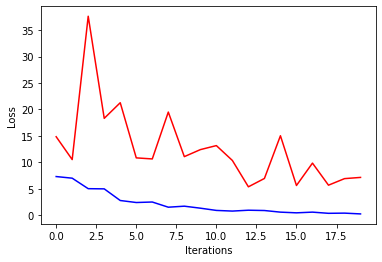

In [27]:
import matplotlib.pyplot as plt
plt.plot(genLoss, c='r', label="Generator Loss")
plt.plot(disLoss, c='b', label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")